In [36]:
from keras.datasets import imdb
from sklearn.metrics import accuracy_score

import numpy as np # linear algebra
import pandas as pd # data processing, 



In [37]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# preprocessing 


In [38]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# change the data into vectors

import numpy as np
from tensorflow import keras


# Chargement des données IMDB
# (train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Pré-traitement des données : tronquer ou remplir les séquences
max_sequence_length = 500  # Longueur maximale d'une séquence
x_train = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=max_sequence_length)


y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



In [39]:
# one hot encoding train_data.size,x_train.size, train_labels.size, x_train.shape 
#(25000, 250000000, 25000, (25000, 10000))
train_data.size,x_train.size, train_labels.size, x_train.shape

(25000, 12500000, 25000, (25000, 500))

In [40]:
# # Create an embedding layer.
# embedding_dim = 16
# embedding = tf.keras.layers.Embedding(encoder.vocab_size, embedding_dim)

In [41]:
from keras import models
from keras import layers
from keras.layers import Embedding, LSTM, Dense

model  = models.Sequential()
# Ajoutez une couche d'embedding pour convertir les indices en vecteurs denses
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(layers.Flatten())  # Flatten layer to flatten the 3D tensor from Embedding layer
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## compiler et entrainer le modele avec une partie du jeu d'entrainement 

In [43]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 5s 133ms/step - loss: 0.6933 - acc: 0.5045 - val_loss: 0.6931 - val_acc: 0.5037
Epoch 2/20
30/30 [==============================] - 4s 130ms/step - loss: 0.6923 - acc: 0.5330 - val_loss: 0.6925 - val_acc: 0.5258
Epoch 3/20
30/30 [==============================] - 4s 124ms/step - loss: 0.6896 - acc: 0.5636 - val_loss: 0.6898 - val_acc: 0.5314
Epoch 4/20
30/30 [==============================] - 4s 126ms/step - loss: 0.6763 - acc: 0.6056 - val_loss: 0.6917 - val_acc: 0.5142
Epoch 5/20
30/30 [==============================] - 4s 122ms/step - loss: 0.6032 - acc: 0.7039 - val_loss: 0.5903 - val_acc: 0.7242
Epoch 6/20
30/30 [==============================] - 4s 125ms/step - loss: 0.4539 - acc: 0.8187 - val_loss: 0.4530 - val_acc: 0.8057
Epoch 7/20
30/30 [==============================] - 4s 124ms/step - loss: 0.3078 - acc: 0.8871 - val_loss: 0.4089 - val_acc: 0.8093
Epoch 8/20
30/30 [==============================] - 4s 131ms/step - loss: 0.

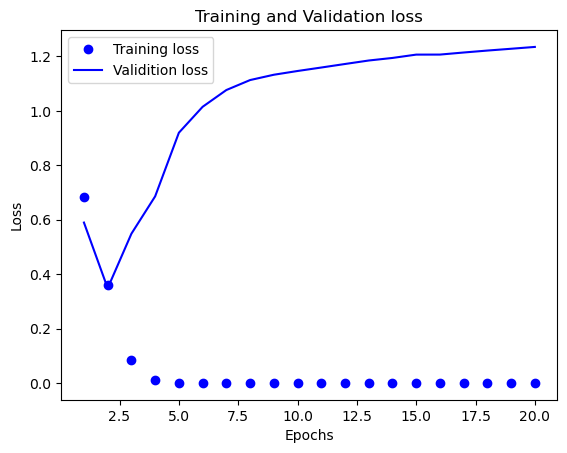

In [28]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1,len(acc) + 1)


plt.plot(epochs,loss_value, 'bo', label='Training loss')
plt.plot(epochs,val_loss_value, 'b', label='Validition loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

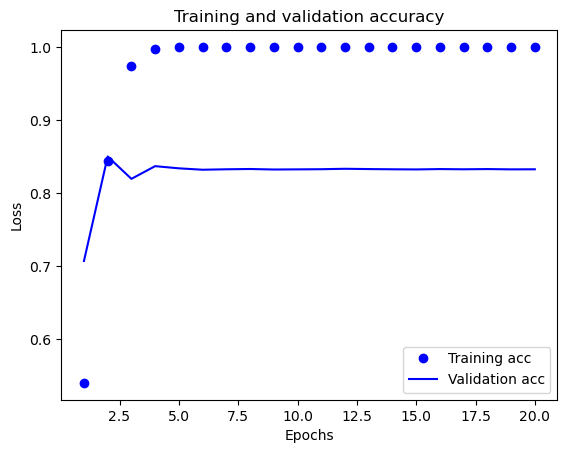

In [29]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
model = models.Sequential()
# Ajoutez une couche d'embedding pour convertir les indices en vecteurs denses
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(layers.Flatten())  # Flatten layer to flatten the 3D tensor from Embedding layer
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=(64))

Epoch 1/5
391/391 [==============================] - 10s 24ms/step - loss: 0.5554 - accuracy: 0.6726
Epoch 2/5
391/391 [==============================] - 10s 26ms/step - loss: 0.2147 - accuracy: 0.9152
Epoch 3/5
391/391 [==============================] - 10s 25ms/step - loss: 0.0604 - accuracy: 0.9835
Epoch 4/5
391/391 [==============================] - 10s 25ms/step - loss: 0.0116 - accuracy: 0.9978
Epoch 5/5
391/391 [==============================] - 10s 25ms/step - loss: 0.0020 - accuracy: 0.9998


In [45]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 4ms/step - loss: 0.5639 - accuracy: 0.8564


In [46]:
results

[0.5638649463653564, 0.8563600182533264]

# predictions et confusion matrice sr tous les jeux 

In [14]:


# Faire des prédictions sur les ensembles de données
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

# Seuil pour la classification binaire
threshold = 0.5

# Convertir les prédictions en classes binaires
y_pred_train_binary = (y_pred_train > threshold).astype(int)
y_pred_val_binary = (y_pred_val > threshold).astype(int)
y_pred_test_binary = (y_pred_test > threshold).astype(int)

# Calcul des métriques
from sklearn.metrics import classification_report, confusion_matrix

print("Métriques sur l'ensemble d'entraînement :")
print(classification_report(y_train, y_pred_train_binary))

print("Métriques sur l'ensemble de validation :")
print(classification_report(y_val, y_pred_val_binary))

print("Métriques sur l'ensemble de test :")
print(classification_report(y_test, y_pred_test_binary))

# Matrices de confusion sur les trois ensembles
confusion_matrix_train = confusion_matrix(y_train, y_pred_train_binary)
confusion_matrix_val = confusion_matrix(y_val, y_pred_val_binary)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test_binary)

print("Matrice de confusion sur l'ensemble d'entraînement :")
print(confusion_matrix_train)

print("Matrice de confusion sur l'ensemble de validation :")
print(confusion_matrix_val)

print("Matrice de confusion sur l'ensemble de test :")
print(confusion_matrix_test)


782/782 [==============================] - 3s 4ms/step
Métriques sur l'ensemble d'entraînement :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12500
         1.0       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Métriques sur l'ensemble de validation :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4947
         1.0       1.00      1.00      1.00      5053

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Métriques sur l'ensemble de test :
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86     12500
         1.0       0.87      0.85      0.86     12500

    accur

# Embetting part 2

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Chargement des données IMDB
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Pré-traitement des données : tronquer ou remplir les séquences
max_sequence_length = 500  # Longueur maximale d'une séquence
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=max_sequence_length)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=max_sequence_length)

# Création du modèle
model = keras.Sequential([
    Embedding(input_dim=10000, output_dim=256, input_length=max_sequence_length),  # Couche d'embedding Word2Vec
    GlobalAveragePooling1D(),  # Réduction de la dimensionnalité
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(train_data, train_labels, epochs=10, batch_size=512, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/10
40/40 [==============================] - 9s 210ms/step - loss: 0.6889 - accuracy: 0.6016 - val_loss: 0.6809 - val_accuracy: 0.6878
Epoch 2/10
40/40 [==============================] - 9s 217ms/step - loss: 0.6618 - accuracy: 0.7056 - val_loss: 0.6294 - val_accuracy: 0.7442
Epoch 3/10
40/40 [==============================] - 8s 207ms/step - loss: 0.5848 - accuracy: 0.7782 - val_loss: 0.5304 - val_accuracy: 0.8014
Epoch 4/10
40/40 [==============================] - 8s 206ms/step - loss: 0.4761 - accuracy: 0.8346 - val_loss: 0.4339 - val_accuracy: 0.8474
Epoch 5/10
40/40 [==============================] - 8s 209ms/step - loss: 0.3832 - accuracy: 0.8690 - val_loss: 0.3737 - val_accuracy: 0.8660
Epoch 6/10
40/40 [==============================] - 9s 217ms/step - loss: 0.3255 - accuracy: 0.8848 - val_loss: 0.3416 - val_accuracy: 0.8688
Epoch 7/10
40/40 [==============================] - 8s 207ms/step - loss: 0.2852 - accuracy: 0.8991 - val_loss: 0.3183 - val_accuracy: 0.8792
Epoch 